# Video game market analysis

Task:
For an online store of computer games, it is necessary to analyze the market, identify patterns that determine the success of games, determine the user profile for each of the regions, and test working hypotheses. This will allow you to place a bet on a potentially popular product and plan advertising campaigns to help develop the store's business.

The data is collected from open sources and recorded in the games.csv file. The data includes information from 1983 to 2016. Data for 2016 may not be complete.

Description of games.csv data:
1. Name - the name of the game 
2. Platform - platform 
3. Year_of_Release - year of release 
4. Genre - game genre 
5. NA_sales - Sales in North America (millions of dollars) 
6. EU_sales - sales in Europe (millions of dollars) 
7. JP_sales - sales in Japan (millions of dollars) 
8. Other_sales - sales in other countries (millions of dollars) 
9. Critic_Score - Critics score (from 0 to 100) 
10. User_Score - user score (from 0 to 10) 
11. Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Steps of the project
1. Data acquisition 
2. Data preprocessing 
3. Exploratory data analysis 
4. Portrait of the user of each region 
5. Research of statistical indicators 
6. Hypothesis testing 
7. Research results 

## Step 1. Data acquisition

Let's take a closer look at the data provided for the project.

In [1]:
# import libraries 
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the csv file and saving it in dataframe df

df = pd.read_csv('Datasets\games.csv')

Lets get top 10 rows of the table 

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Summary of dataframe df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Let's delve deeper into the information we have received.

The table consists of 11 columns. Among these columns, we have two different data types: non-null object, which is present in 5 columns, and non-null float64, which is present in 6 columns.

The number of values in the columns varies. This indicates that there are missing values in the data.

### Conclusions:

1. The table provides a comprehensive overview of historical game sales data, including information on sales, ratings, genres, platforms, release years, and age ratings.

2. Two main issues need to be addressed in the next steps of the analysis. First, there are gaps in the data that need to be handled appropriately. Second, some column names may require improvements to enhance clarity and consistency.

3. Certain columns such as Genre, Platform, Year_of_Release, and regional sales breakdowns are particularly valuable for testing hypotheses and conducting further analysis. These columns allow us to track changes in user preferences over time and compile user profiles for each region.

4. The columns Critic_Score, User_Score, and Rating can be used to test hypotheses regarding the impact of game ratings on sales, considering factors such as genre and platform of game release.

By addressing the data gaps and refining column names, we can gain deeper insights into user preferences, market trends, and the relationship between ratings and sales. These findings will help inform decision-making processes, such as planning advertising campaigns, identifying potential popular products, and driving business growth for the online game store. 

## Stage 2. Data preprocessing

We will replace the column names, convert the data to the required types, process the gaps (with filling where possible), check the data for duplicates, and also calculate the total sales in all regions and write them in a separate column.

Get a list of column names.

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Let's convert the column names to lowercase for easier data access and convenience. After renaming the columns, we can verify the result by displaying the updated column names.

In [6]:
# Renaming columns
df = df.rename(columns=lambda x: x.lower())

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Let's check for duplicates in the dataset and remove them if any are found. After removing the duplicates, we can verify if all duplicates have been eliminated by checking the dataset again.

In [8]:
# getting the total number of duplicates in the df table
df.duplicated().sum()

0

No duplicates found. Let's take care of the missing values.

Let's check the data for gaps by calling a set of methods to summarize the missing values.

In [9]:
# total number of gaps in table df
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### Handling missing data in column 'name'

First, let's look at the rows with missing data in the name column. 

In [10]:
# select rows with missing data in the name column
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There are only two such lines. Moreover, these rows contain gaps in other columns (genre, critic_score, user_score, rating) and refer to games released in 1993 on the GEN platform. Thus, these rows will be considered not relevant and not able to significantly affect the results of the analysis, so we will delete these rows.

In [11]:
# As we don't have name for two games we can delete those rows and reset the index
df = df.dropna(subset =['name']).reset_index(drop = True)

In [12]:
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

We can see that the two columns with null values have been removed successfully 

### Handling missing data in 'year_of_release' column

Let's look at data gaps in the year_of_release column

In [13]:
# select rows with missing data in the year_of_release column
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


We don't have release year data for 269 games.
Note that some of the lines in the title of the game have a release year. It can be used as a replacement for missing data for the year_of_release column

Let's search for such strings and use that to fill up the gaps for such years.

In [14]:
for index, row in df[df['year_of_release'].isna()].iterrows():
    for item in row['name'].split(' '):
        if item == row['name'].split(' ')[-1]:
            try:
                if len(item) == 2 or len(item) == 4:
                    item = int(item)
                    if item < 21:
                        item += 2000
                    elif item > 80 and item < 100:
                        item += 1900
                    if item >= 1980:
                        df.loc[index, 'year_of_release'] = item
            except:
                continue


In [15]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Now we don't have release year data for 249 games. This is less than after the previous check, which means the replacements were completed successfully.

It is possible to find the release years of games for the remaining 249 rows using the parsing of pages on the Internet, but at this stage we consider it possible to simply get rid of these rows and continue working with the existing dataset. because 249 rows is only about 1.49% of the total amount of data, which should not significantly affect the results of the study. If at some stage we realize that we will not have enough data, then we will return to the issue of parsing pages on the Internet to find the missing information.

In [16]:
df.isnull().sum()

name                  0
platform              0
year_of_release     249
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [17]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [18]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         6610
rating             6682
dtype: int64

### Handling missing data in the 'critic_score' column

Let's look at data gaps in the critic_score column 

In [19]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16459,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16460,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16461,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16462,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


We will investigate the correlation between critics' ratings and the following factors:

1. Year of release of the game
2. Sales in North America (na_sales)
3. Sales in Europe (eu_sales)
4. Sales in Japan (jp_sales)
5. Sales in other regions (other_sales)
6. Global sales (global_sales)

In [20]:
df['year_of_release'].corr(df['critic_score'])

0.010353467558889762

The correlation is very weak. Its almost complete absence.

Let's calculate the total sales for each of the games around the world (create a new column global_sales)

In [21]:
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16459,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16460,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16461,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16462,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [22]:
df['na_sales'].corr(df['critic_score'])

0.24081751449345798

In [23]:
df['eu_sales'].corr(df['critic_score'])

0.221334645150233

In [24]:
df['jp_sales'].corr(df['critic_score'])

0.15319263872334976

In [25]:
df['other_sales'].corr(df['critic_score'])

0.19891456778301783

In [26]:
df['global_sales'].corr(df['critic_score'])

0.24584356447587416

Since the correlation between critics' scores and sales data is relatively weak (with correlation coefficients ranging from approximately 0.15 to 0.25), it suggests that there is not a strong linear relationship between these variables.

In this context, it implies that filling up the gaps in the critic score data using sales data may not be very helpful or reliable. The weak correlation indicates that sales data alone may not provide a strong basis for accurately estimating or imputing missing critic scores.

### Handling missing data in the 'user_score' column

Now let's look at the missing data in the user_score column.

First, let's look at the values ​​in the user_score column. 

In [27]:
df.user_score.value_counts()

tbd    2378
7.8     322
8       285
8.2     277
8.3     252
       ... 
1.9       2
2.3       2
0.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

The most common value is not the user's numerical score, but the string 'tbd', meaning 'to be defined'. In this situation, we can use the property of the average: if you add a number equal to the average to the dataset, then the new average of the dataset will not change, so we can replace tbd with the average in the same way as in cases where there are no NaN values.

In [28]:
df = df.replace('tbd', np.nan)

In [29]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating             6682
global_sales          0
dtype: int64

Change data type 'user_score' from string to floating point numbers

In [30]:
df['user_score'] = df.user_score.astype('float')

In [31]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
global_sales       float64
dtype: object

The data type has been changed from object to float64. Now we can perform mathematical operations on the user_score column data.

We will investigate the correlation between user's score and the following factors:

1. Year of release of the game
2. Sales in North America (na_sales)
3. Sales in Europe (eu_sales)
4. Sales in Japan (jp_sales)
5. Sales in other regions (other_sales)
6. Global sales (global_sales)
7. Critic's rating (critic_score)

In [32]:
df['year_of_release'].corr(df['user_score'])

-0.2682635599589682

In [33]:
df['na_sales'].corr(df['user_score'])

0.08570745189151249

In [34]:
df['eu_sales'].corr(df['user_score'])

0.055267291304242364

In [35]:
df['jp_sales'].corr(df['user_score'])

0.12617410277268787

In [36]:
df['other_sales'].corr(df['user_score'])

0.05701154340120891

In [37]:
df['global_sales'].corr(df['user_score'])

0.08797432650715242

In [38]:
df['critic_score'].corr(df['user_score'])

0.5792013058120697

Let's look at the distributions of user ratings and critic ratings and their dependencies.

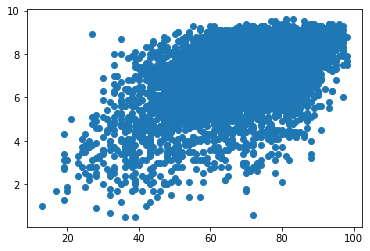

In [39]:
plt.scatter(df['critic_score'],df['user_score']);

The distributions are close to normal. The correlation is moderate.

In all the cases considered, we obtained either a very weak or simply a weak correlation between the features considered and user ratings. The average correlation was obtained only between user ratings and critic ratings:

1. minimum 'sales in Europe of the game VS user rating': 0.055..
2. Max 'Critic Rating VS User Rating': 0.579..

We did not get a high or very high correlation for any of the studied traits. Therefore, averaging user ratings against one of these criteria to fill in data gaps is not appropriate.

### Handling missing data in the 'rating' column

Since rating is a nominative variable, the most reasonable thing to do would be to replace missing values with 'unknown'

In [40]:
df['rating'] = df['rating'].fillna('unknown')

In [41]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating                0
global_sales          0
dtype: int64

After handling missing values, there are still gaps in the critic_score and user_score columns. We don't have enough data to fill these gaps, and it appears that the missing values often occur together for the same games. This suggests that the data for these games were not loaded into the table. We have made some conclusions and can now proceed to the next step of analysis.

### Conclusions:

1. Column names have been renamed for convenience, and missing values have been searched and replaced.
2. Missing values were found in the name, year_of_release, critic_score, user_score, and rating columns.
3. The number of missing values in the name column is not critical, likely due to chance.
4. For the year_of_release column, some values were restored from game titles, while the remaining missing data were omitted as  they had minimal impact on the overall analysis.
5. Missing values in critic_score and user_score account for about half of the data and often occur together. It's likely that ratings were not assigned or not loaded into the table. Attempts to fill these gaps using sales correlations were unsuccessful, so the missing values were kept to maintain data quality.
6. Missing game ratings were replaced with 'unknown' since it's a categorical variable.
7. Many missing ratings and scores are associated with older games from the 1980s or recent games that haven't aggregated ratings yet.
8. Total sales were calculated and stored in the 'global_sales' column.

The data is now prepared for further analysis.

# Step 3. Exploratory data analysis

Consider the distribution of games by year of release, evaluate the popularity of gaming platforms in certain periods of time, select relevant data for further work, making forecasts and conclusions.

### Distribution of games by year of release

Let's see how many games were released in different years.

In [42]:
games_per_year = df.groupby('year_of_release', as_index=False).name.count().rename(columns={'name':'games_number'})

In [43]:
games_per_year

,year_of_release,games_number
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


Let's build a bar graph of the distribution of the number of released games by year.

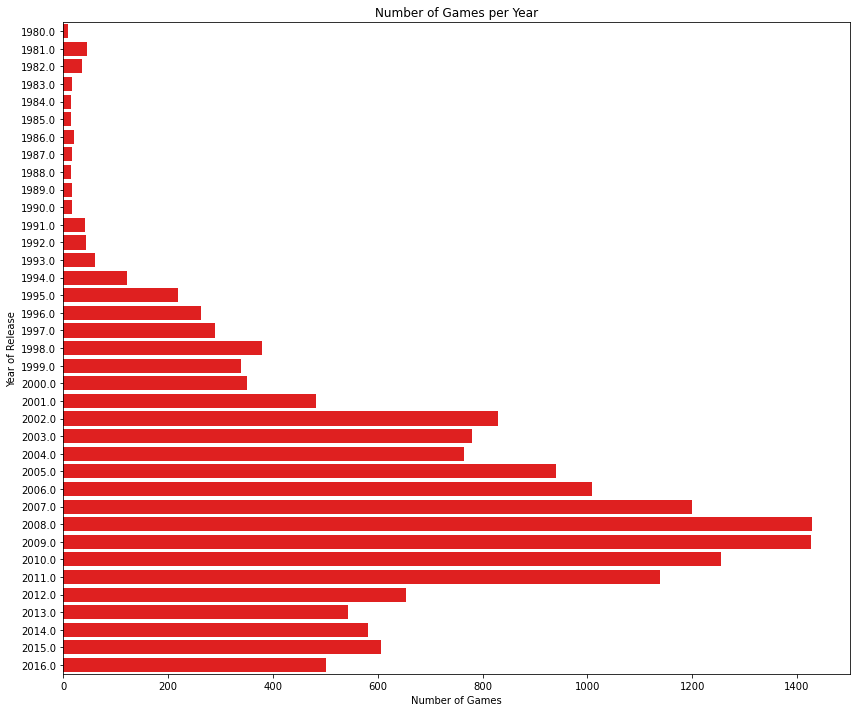

In [44]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Create the bar plot
sns.barplot(data=games_per_year, x='games_number', y='year_of_release', color='red', orient='h',ax=ax)

# Customize the plot
ax.set_xlabel('Number of Games')
ax.set_ylabel('Year of Release')
ax.set_title('Number of Games per Year')

# Show the plot
plt.tight_layout()
plt.show()


The graph shows that the bulk of games were released in the first decade of the twenty-first century, with a peak in 2008-2009. After 2011, there has been a significant decline in the number of released games (growth in popularity of social networks?).

Estimate the cumulative percentage of the number of released games

In [45]:
# Sort the DataFrame by year_of_release in ascending order
games_per_year_sorted = games_per_year.sort_values('year_of_release')

# Calculate the cumulative sum of games_number
games_per_year_sorted['cumulative_sum'] = games_per_year_sorted['games_number'].cumsum()

# Calculate the cumulative percentage
games_per_year_sorted['cumulative_percentage'] = (games_per_year_sorted['cumulative_sum'] / games_per_year_sorted['games_number'].sum()) * 100

# Print the DataFrame with cumulative percentage
print(games_per_year_sorted[['year_of_release', 'games_number', 'cumulative_percentage']])


    year_of_release  games_number  cumulative_percentage
0            1980.0             9               0.054665
1            1981.0            46               0.334062
2            1982.0            36               0.552721
3            1983.0            17               0.655977
4            1984.0            14               0.741011
5            1985.0            14               0.826045
6            1986.0            21               0.953596
7            1987.0            16               1.050777
8            1988.0            15               1.141885
9            1989.0            17               1.245141
10           1990.0            16               1.342323
11           1991.0            41               1.591351
12           1992.0            43               1.852527
13           1993.0            60               2.216958
14           1994.0           121               2.951895
15           1995.0           219               4.282070
16           1996.0           2

Building a cumulative chart of the percentage of games released

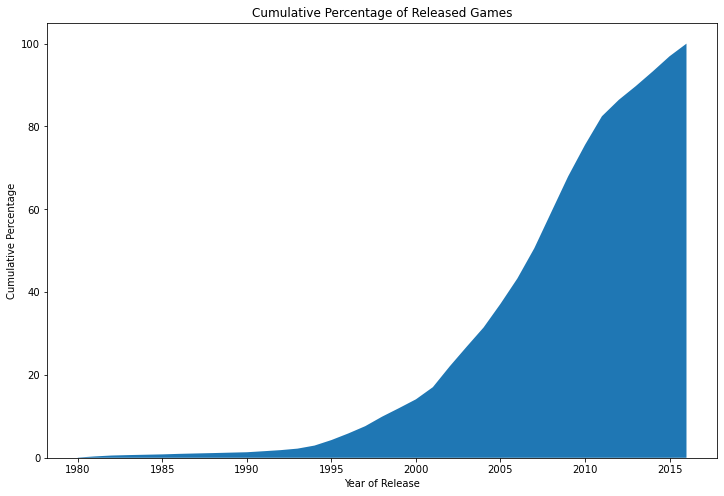

In [46]:
plt.figure(figsize=(12,8))
plt.stackplot(games_per_year_sorted['year_of_release'], games_per_year_sorted['cumulative_percentage'])
plt.xlabel('Year of Release')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Percentage of Released Games')
plt.show()

According to the data obtained, it is clearly seen that for the first half of the presented period (from 1983 to 1999) about 11% of the total number of released games were released, and for the second half, the remaining 89%. Half of the released games were released between 2007 and 2016. Thus, we can conclude that the data for the 80s and 90s of the twentieth century do not carry much weight in quantitative terms for the available data set.

Let's look at the dynamics of total sales.

In [47]:
df_sales = df.groupby('year_of_release', as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('global_sales', ascending=False)

In [48]:
df_sales

,year_of_release,global_sales
28,2008.0,671.52
29,2009.0,658.82
27,2007.0,606.07
30,2010.0,590.13
26,2006.0,521.33
31,2011.0,508.35
25,2005.0,458.29
24,2004.0,427.42
22,2002.0,395.55
33,2013.0,361.24


Text(0.5, 1.0, 'Global Sales Per Year')

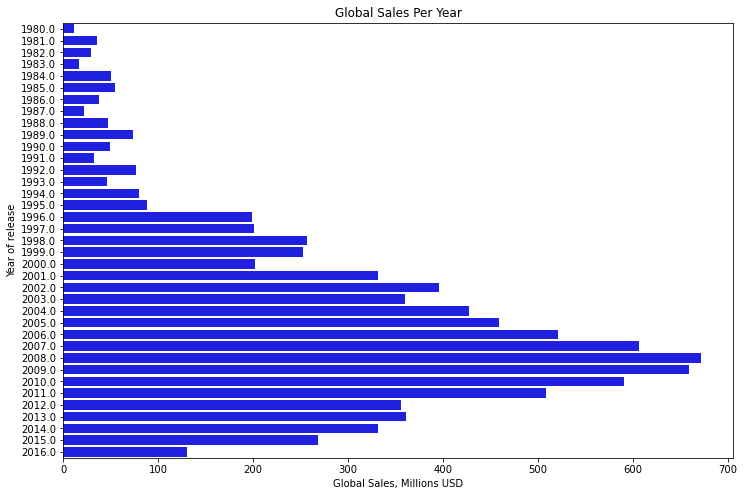

In [49]:
plt.figure(figsize=(12,8))

ax = sns.barplot(y = df_sales['year_of_release'], x = df_sales['global_sales'], orient = 'h', color = 'blue')

plt.xlabel('Global Sales, Millions USD')
plt.ylabel('Year of release')
plt.title('Global Sales Per Year')

The dynamics of overall sales in general closely follows the dynamics of the release of new games, with a peak in 2008-2009 and then a decline to the values ​​of the early 2000s, when the computer games industry was at the beginning of its rise.

Next, consider the distribution of sales by platform. Let's define fashionable in the past and popular now platforms. Let's evaluate the life cycle of platforms.

### Changing sales by platform

In [50]:
platform_sales = df.groupby('platform',as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales',ascending = False) 

In [51]:
platform_sales

,platform,global_sales
16,PS2,1247.28
28,X360,961.88
17,PS3,931.34
26,Wii,892.37
4,DS,802.79
15,PS,729.04
18,PS4,314.14
6,GBA,312.88
19,PSP,290.38
2,3DS,257.81


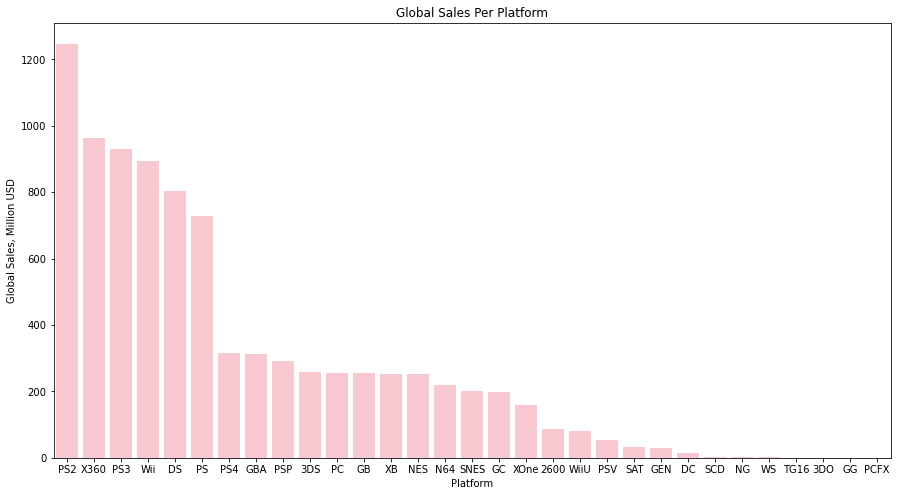

In [52]:
plt.figure(figsize = (15,8))

ax = sns.barplot(x = platform_sales['platform'],y = platform_sales['global_sales'], color = 'pink')

plt.ylabel('Global Sales, Million USD')
plt.xlabel('Platform')
plt.title('Global Sales Per Platform');

The graph clearly shows the leaders in total global sales: PS2, X360, PS3, Wii, DS, PS. There is a gap of 2-4 times compared to the next platform in revenue PS4. The data of the top 6 platforms is the main contender for detailed further analysis. However, you must first check the relevance of certain platforms.

To assess the dynamics of platform popularity over the years, we will select platforms whose total sales exceed the median value, i.e. Let's take the first half of the list ranked by world sales.

In [53]:
platforms_above_median = [] 

for row in platform_sales.itertuples():
    if row.global_sales > platform_sales.global_sales.median():
        platforms_above_median.append(row.platform)
        
platforms_above_median

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'PS4',
 'GBA',
 'PSP',
 '3DS',
 'PC',
 'GB',
 'XB',
 'NES',
 'N64']

In [54]:
platform_sales_year = df.query('platform in @platforms_above_median') \
    .groupby(['year_of_release', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year_of_release', ascending=True)

platform_sales_year

,year_of_release,platform,global_sales
0,1983.0,NES,10.96
1,1984.0,NES,50.08
2,1985.0,DS,0.02
3,1985.0,NES,53.44
4,1985.0,PC,0.04
...,...,...,...
158,2016.0,3DS,15.14
159,2016.0,PC,5.25
160,2016.0,PS3,3.60
161,2016.0,PS4,69.25


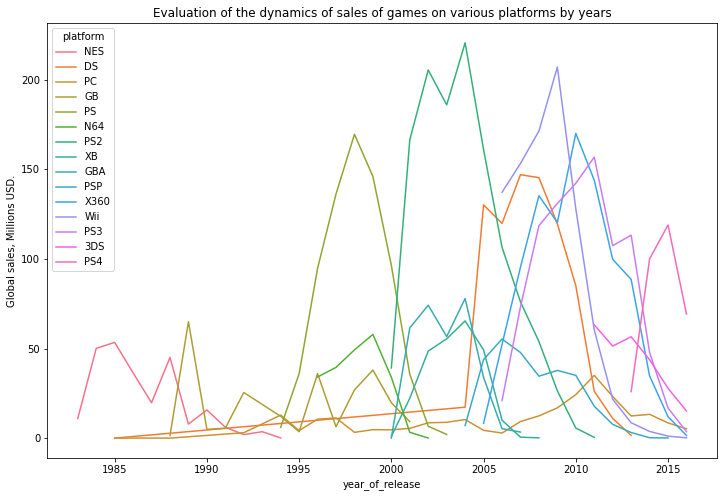

In [55]:
plt.figure(figsize=(12, 8))

sns.lineplot(x=platform_sales_year.year_of_release,
             y=platform_sales_year.global_sales,
             hue=platform_sales_year.platform);

plt.ylabel('Global sales, Millions USD.');
plt.title('Evaluation of the dynamics of sales of games on various platforms by years');

Let's build a graph of the distribution of the life cycle of platforms. Consider the main statistics of the resulting indicator.

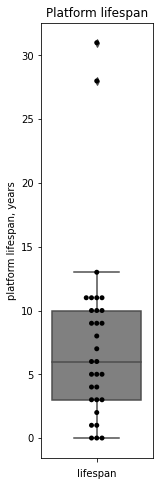

In [56]:
life_span = df.groupby('platform').year_of_release.max() - df.groupby('platform').year_of_release.min()

fig, (ax1) = plt.subplots(
    nrows=1, ncols=1,
    figsize=(2, 8)
)

sns.boxplot(y=life_span, color='grey', ax=ax1)
sns.swarmplot(y=life_span, color='black')

ax1.set_title('Platform lifespan')
ax1.set_xlabel('lifespan')
ax1.set_ylabel('platform lifespan, years');

The graph shows that there are two outliers, otherwise, most of the data is placed inside the interquartile range. Due to the presence of outliers, we will use the median value (6 years) when we talk about the average value of the platform life cycle.

In [57]:
life_span.describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: year_of_release, dtype: float64

The resulting graphs clearly show that the average platform life cycle is 6 years (the only exception is PC and DS). We also see that the overall bestseller PS2 has completely exhausted itself and its last sales were in 2011. 

Therefore, it will be incorrect for our tasks to select data by the size of sales for the entire history. We thus greatly distort the results of our research. 

Therefore, we will take another criterion for our sample: we will take half the value of the third quartile (5 years). Thus, our sample will include platforms at the peak of popularity, as well as new emerging platforms that will be popular in the future.

In [58]:
plt_sales_5year = df.query('year_of_release > 2011') \
    .groupby(['year_of_release', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year_of_release', ascending=True)

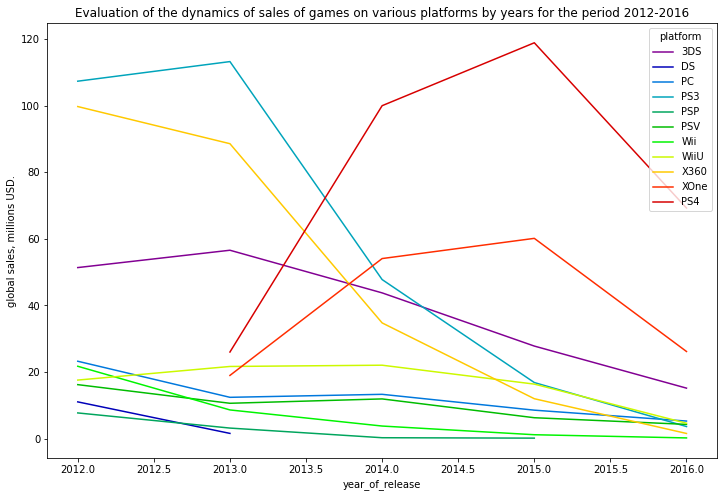

In [59]:
plt.figure(figsize=(12, 8))

sns.lineplot(x=plt_sales_5year.year_of_release,
             y=plt_sales_5year.global_sales,
             hue=plt_sales_5year.platform,
             legend='full',
             palette='nipy_spectral');

plt.ylabel('global sales, millions USD.');
plt.title('Evaluation of the dynamics of sales of games on various platforms by years for the period 2012-2016');

Considering that our data for 2016 is not complete, having adjusted for this, using the graph above, we can say that at the moment only two platforms are still growing and promising: PS4 and XOne. The remnants of popularity are in the 3DS. Sales of games on other platforms are insignificant or tend to zero. Therefore, at this stage of the study, we will continue to work with these three platforms: PS4, XOne, 3DS.

### Further exploration of PS4, XOne, 3DS platforms

Let's make a slice of the dataframe, which will include data for the last 5 years only for three selected platforms based on the results of the previous step. Let's take a closer look at the breakdown of sales by platform.

In [60]:
popular_platforms = ['PS4', 'XOne', '3DS']  

df_3p = df.query('platform in @popular_platforms & year_of_release > 2011') \
          .reset_index(drop=True)

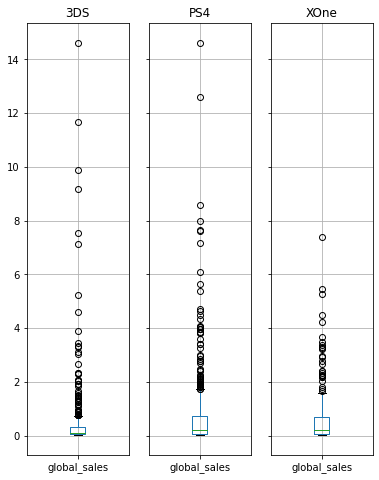

In [61]:
df_3p.groupby(['platform']).boxplot(column='global_sales',
                                    figsize=(6, 8),
                                   layout=(1, 3) );

In [62]:
df_3p.groupby(['platform']).global_sales.describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.04,0.11,0.3125,14.60
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


According to the resulting graph, we can observe that the average values ​​for all platforms are approximately the same. We can also tell by the presence of a large number of outliers on the charts of all platforms that the main revenue comes from a small number of hit games. 

Their sales are 11-20 times higher than the average total sales. Moreover, there are more such hit games both in terms of the total number and the amplitude of the observed effect on the 3DS and PS4 platforms.

Let's find the game with the highest global sales for each of the platforms.

In [63]:
df_3p.groupby(['platform']).global_sales.idxmax()

platform
3DS      1
PS4      0
XOne    11
Name: global_sales, dtype: int64

In [64]:
df_3p.iloc[[1, 0, 11]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
1,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
11,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39


For the PS4 and XOne platforms, 'Call of Duty: Black Ops 3 (2015)' was the best-selling game, while for the 3DS it was 'Pokemon X/Pokemon Y' from 2013, which confirms the thesis that the popularity of this game will decrease over time. platforms.

let's look at the overall distribution of games by genre for the previously selected data (PS4, XOne, 3DS platforms; data from 2012).

In [65]:
genres_sales_all = df_3p.groupby(['genre'], as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales',ascending = False)

In [66]:
genres_sales_all

,genre,global_sales
0,Action,178.90
8,Shooter,149.02
7,Role-Playing,118.84
10,Sports,86.58
4,Platform,27.73
3,Misc,25.07
6,Racing,22.21
9,Simulation,21.85
2,Fighting,19.56
1,Adventure,13.32


Text(0.5, 1.0, 'Overall distribution of game sales by genre for PS4, XOne and 3DS since 2012')

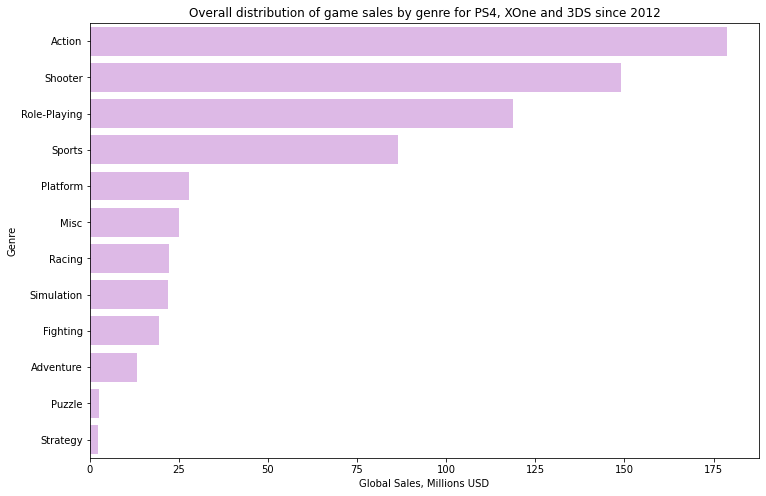

In [67]:
plt.figure(figsize = (12,8))

ax = sns.barplot(y=genres_sales_all.genre,
                 x=genres_sales_all.global_sales,
                 orient='h',
                 color='#e2b2ed',
                 ci=None);

plt.xlabel('Global Sales, Millions USD')
plt.ylabel('Genre')
plt.title('Overall distribution of game sales by genre for PS4, XOne and 3DS since 2012')

The most popular genres are Action, Shooter and Role-Playing. The fourth place is occupied by the Sports genre. Sales for other games differ significantly. Sales of games in the most unpopular genres (Puzzle and Strategy) differ tenfold compared to other genres.

Let's see the popularity of genres by platform.

In [68]:
genres_sales = df_3p.groupby(['genre', 'platform'], as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)

In [69]:
genres_sales

,genre,platform,global_sales
1,Action,PS4,96.10
24,Shooter,PS4,88.56
20,Role-Playing,3DS,79.30
25,Shooter,XOne,60.33
30,Sports,PS4,55.61
0,Action,3DS,45.49
2,Action,XOne,37.31
21,Role-Playing,PS4,28.99
31,Sports,XOne,26.74
26,Simulation,3DS,19.93


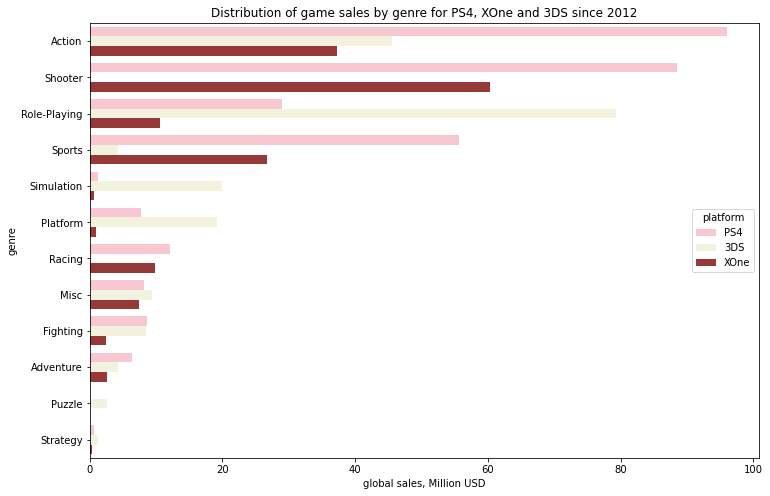

In [70]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(y=genres_sales.genre,
                 x=genres_sales.global_sales,
                 orient='h',
                 color='#6925c2',
                 palette=['pink', 'beige', 'brown'],
                 hue=genres_sales.platform,
                 hue_order=['PS4', '3DS', 'XOne']
                 );

plt.xlabel('global sales, Million USD')
plt.title('Distribution of game sales by genre for PS4, XOne and 3DS since 2012');

It is interesting to note that the 3DS platform stands out in terms of genre preferences. For example, the Shooter genre is not popular on the 3DS, while Role-Playing takes the first place by a significant margin. Among PS4 users, the Sports genre (ranked 4th overall) is the most popular.

### Conclusions:

During this stage, exploratory data analysis was conducted, revealing the following insights:

1. The number of games released varied across different time periods, with half of the represented games released between 2007 and 2016.
2. The average lifespan of gaming platforms is around 6 years.
3. Three current and prospective platforms were identified as the most rele
4. The most popular genres in the past five years are Action, Shooter, and Role-Playing. The popularity of genres varies across platforms, with users of the 3DS platform displaying distinct preferences. For example, Shooter games are not of interest to these users, despite being popular on other platforms.
5. It was also observed that a significant portion of the total revenue is generated by a small number of hit games, whose sales surpass those of average games by tens of times on a global scale.

# Stage 4. User portrait of each region

Let's determine for the user of each region the most popular platforms, the most popular genres, as well as the impact of the ESRB rating on sales by region.

Let's take the most relevant data, making a sample for the last 5 years (starting from 2012).

In [71]:
df_4 = df[df['year_of_release'] > 2011].reset_index(drop=True)

In [72]:
df_4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2882,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2884,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


### Let's determine the popularity of platforms by region. 

In [73]:
df_4_region = df_4[['platform', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('platform', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['platform']) \
    .sort_values('value', ascending=False)


In [74]:
df_4_region

,platform,variable,value
15,PS4,eu_sales,141.09
9,X360,na_sales,140.05
4,PS4,na_sales,108.74
14,PS3,eu_sales,106.86
3,PS3,na_sales,103.38
10,XOne,na_sales,93.12
22,3DS,jp_sales,87.79
20,X360,eu_sales,74.52
0,3DS,na_sales,55.31
21,XOne,eu_sales,51.59


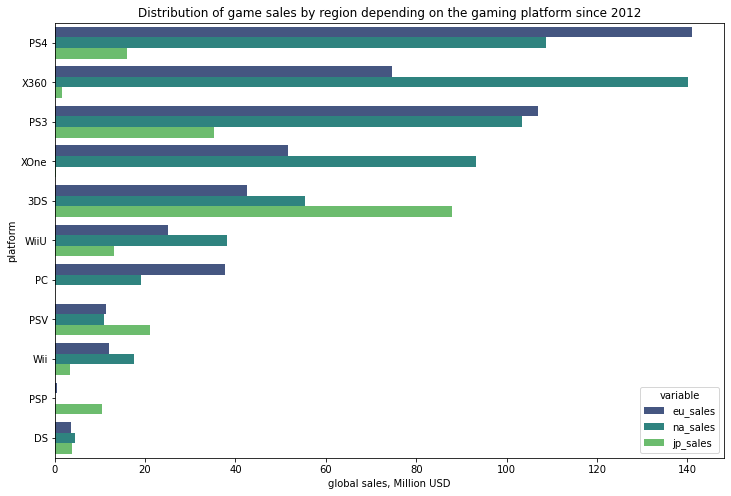

In [75]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(y=df_4_region.platform,
                 x=df_4_region.value,
                 orient='h',
                 color='#6925c2',
                 palette='viridis',
                 hue=df_4_region.variable);

plt.xlabel('global sales, Million USD')
plt.title('Distribution of game sales by region depending on the gaming platform since 2012');

The list of Top 5 platforms is as follows:

1. PS4
2. X360
3. PS3
4. XONE
5. 3DS

It should be noted that in the European market the platforms of the manufacturer Sony (PS4, PS3) are the most popular, while in North America the most popular game consoles are Microsoft (X360 and its successor XOne). In Japan, the most popular platform is the 3DS produced by the local company Nintendo.

### Let's define the most popular genres of games by region.

In [76]:
df_4_genre = df_4[['genre', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('genre', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)

In [77]:
df_4_genre

,genre,variable,value
0,Action,na_sales,177.84
12,Action,eu_sales,159.34
8,Shooter,na_sales,144.77
20,Shooter,eu_sales,113.47
10,Sports,na_sales,81.53
22,Sports,eu_sales,69.09
31,Role-Playing,jp_sales,65.44
7,Role-Playing,na_sales,64.00
24,Action,jp_sales,52.80
19,Role-Playing,eu_sales,48.53


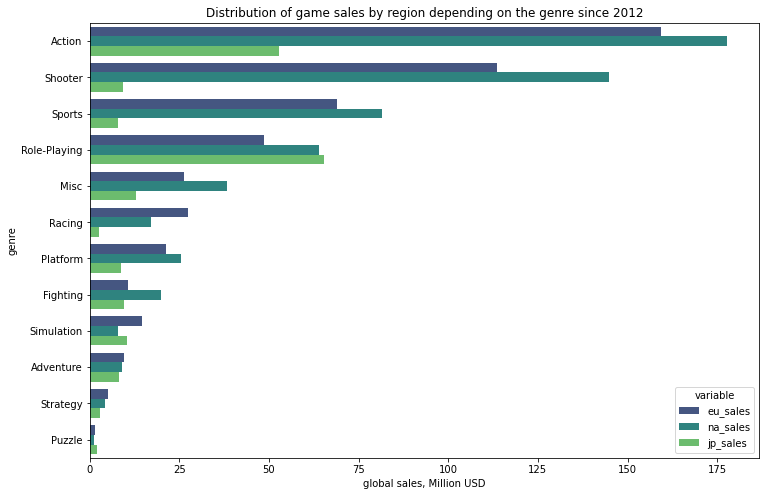

In [78]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(y=df_4_genre.genre,
                 x=df_4_genre.value,
                 orient='h',
                 color='#6925c2',
                 palette='viridis',
                 hue=df_4_genre.variable,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

plt.xlabel('global sales, Million USD')
plt.title('Distribution of game sales by region depending on the genre since 2012');

List of Top 5 most popular genres:

1. action
2. shooter
3. sports
4. Role Playing
5. misc

Note that in Japan, shooters are much less popular in comparison with Europe and North America. In the Japanese archipelago, the most popular genres are Role-Playing and Action. It is also worth noting that the total sales of games of all genres in North America and Europe are approximately comparable, while in the Asian market it is less than half.

### Consider the impact of the ESRB rating on sales in a particular region


In [79]:
df_4_rating = df_4[['rating', 'na_sales', 'eu_sales', 'jp_sales']] \
    .groupby('rating', as_index=False) \
    .agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
    .melt(id_vars=['rating']) \
    .sort_values('value', ascending=False)

In [80]:
df_4_rating

,rating,variable,value
2,M,na_sales,231.57
7,M,eu_sales,193.96
0,E,na_sales,114.37
5,E,eu_sales,113.03
14,unknown,jp_sales,108.84
4,unknown,na_sales,103.31
9,unknown,eu_sales,91.50
1,E10+,na_sales,75.70
3,T,na_sales,66.02
6,E10+,eu_sales,55.37


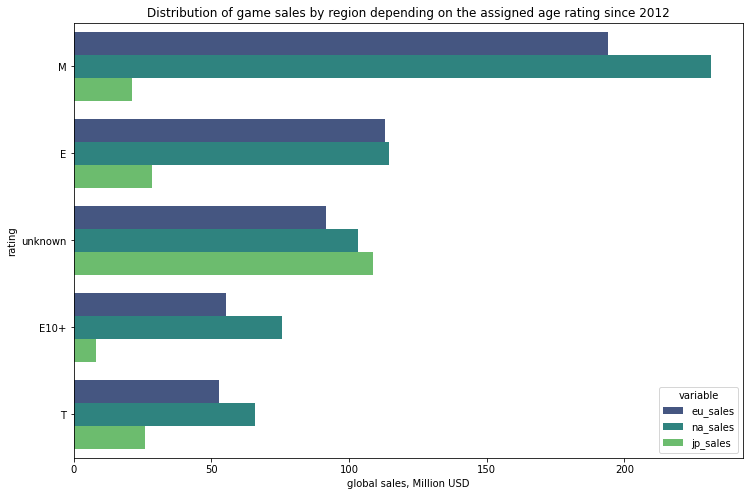

In [81]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(y=df_4_rating.rating,
                 x=df_4_rating.value,
                 orient='h',
                 color='#6925c2',
                 palette='viridis',
                 hue=df_4_rating.variable,
                 hue_order=['eu_sales', 'na_sales', 'jp_sales']);

plt.xlabel('global sales, Million USD')
plt.title('Distribution of game sales by region depending on the assigned age rating since 2012');

Games that received a Mature (M) age rating (suitable for players aged 17 and older) are twice as popular as other rating categories in the European and North American markets. The remaining rating categories are relatively evenly distributed in these markets. In Japan, however, games with an unknown rating have the highest popularity, also surpassing their competitors by a factor of two. This can be attributed not only to user preferences but also to the fact that the rating organization (ESRB, located in New York City, New York, U.S.) may not pay sufficient attention to games released locally in the Asian market.

### Conclusions:

Based on the analysis, we can conclude that the user profile in the North American and European regions does not differ significantly, while Asian consumers stand out in terms of the analyzed parameters (platform preferences, favorite genre, and the situation with ratings for top-selling games). Therefore, it is important to consider the historical and cultural differences of the regions, which directly influence user preferences, when conducting business.

# Step 5. Research of statistical indicators

At this stage, we will study the user rating and the rating of critics in more detail. Let's explore the statistics.

Let's take the data slice used in the previous step (data for the last 5 years (starting from 2012).

In [82]:
df_5 = df_4.assign(critic_score= lambda x: x.critic_score / 10) \
    .groupby('genre', as_index=False)\
    .agg({'critic_score': 'mean', 'user_score': 'mean'}) \
    .melt(id_vars=['genre']) \
    .sort_values('value', ascending=False)

In [83]:
df_5

,genre,variable,value
17,Puzzle,user_score,7.633333
11,Strategy,critic_score,7.587097
5,Puzzle,critic_score,7.544444
13,Adventure,user_score,7.466667
4,Platform,critic_score,7.461017
8,Shooter,critic_score,7.342197
7,Role-Playing,critic_score,7.304969
10,Sports,critic_score,7.289510
3,Misc,critic_score,7.280702
1,Adventure,critic_score,7.266102


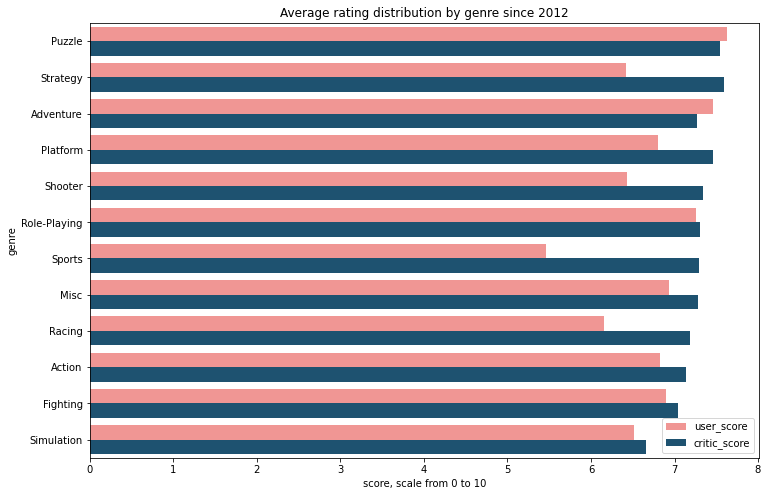

In [84]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(y=df_5.genre,
                 x=df_5.value,
                 orient='h',
                 color='#6925c2',
                 palette=['#FF8785', '#10567E'],
                 hue=df_5.variable);

ax.legend(loc = 'best')
plt.xlabel('score, scale from 0 to 10')
plt.title('Average rating distribution by genre since 2012');

In most cases, the assessments of critics and users agree quite well. Especially for the Puzzle and Role-Playing genres.

The greatest discrepancies in ratings between critics and users are observed for the Sports and Racing genres (in both cases, critics are more favorable to games than users).

The genres with the highest average critical acclaim are Strategy, Platform, and Puzzle.

It is interesting to note that for all genres, the average critic rating is almost always higher than the average user rating (exceptions: Puzzle and Adventure).

Let's look at the distribution of critics' and users' ratings.

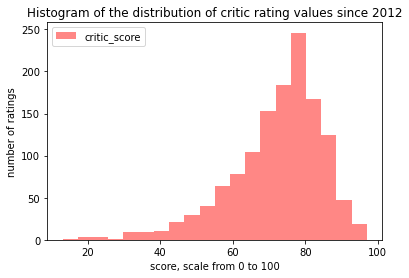

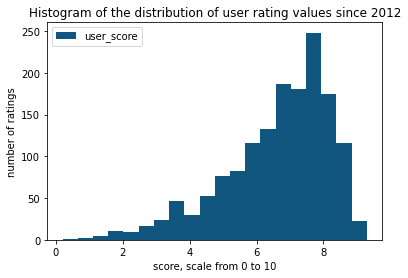

In [85]:
df_4.plot(y='critic_score',
          kind='hist',
          bins=20,
          color='#FF8785')

plt.legend(loc = 'upper left')
plt.xlabel('score, scale from 0 to 100')
plt.ylabel('number of ratings')
plt.title('Histogram of the distribution of critic rating values since 2012');

df_4.plot(y='user_score',
          kind='hist',
          bins=20,
          color='#10567E')

plt.legend(loc = 'best')
plt.xlabel('score, scale from 0 to 10')
plt.ylabel('number of ratings')
plt.title('Histogram of the distribution of user rating values since 2012');

Both distributions are close to normal. They are unimodal and symmetrical in shape. This means that there are no serious errors in the data and you can treat them as really independent and random relative to each other. Therefore, in what follows we can use the basic statistical mat. apparatus for testing various hypotheses.

Let's look at the distributions of the main statistics of critics' and users' ratings (mean, variance, standard deviation).

In [86]:
df_5_wide = df_4.assign(critic_score= lambda x: x.critic_score / 10) \
    .groupby('genre', as_index=False)\
    .agg({'critic_score': ['mean', 'var', 'std'],
          'user_score': ['mean', 'var', 'std']}) \
    .style.highlight_min(axis=0, color='#FFC3C2') \
    .highlight_max(axis=0, color='#D8ECC1')

df_5_wide

### Conclusions:

Strategy games received the highest average scores from critics, while simulation games received the lowest. Among critics, sports games had the highest variation in scores, while puzzle games had the lowest.

Puzzle games received the highest average scores from users, while sports games received the lowest. Among users, strategy games had the highest variation in scores, while puzzle games had the lowest.

It is possible that there is a group of regular users who strongly dislike sports games and consistently give them extremely low scores. Critics, on the other hand, tend to base their ratings more on the overall quality of the games rather than personal genre preferences. This could explain the significant difference in scores for sports games between critics and users, as well as the higher variation in scores (variance and standard deviation) among users, particularly for sports games, after strategy games.

# Step 6. Hypothesis testing

### Hypothesis Test 1.

Null hypothesis: The average user ratings of the Xbox One and PC platforms are the same.
Alternative hypothesis: The average user ratings of the Xbox One and PC platforms are different.

In [87]:
# Perform the necessary data sampling for hypothesis testing
sample_1 = np.asarray(df_4.query('platform == "XOne"').user_score.to_list())
sample_2 = np.asarray(df_4.query('platform == "PC"').user_score.to_list())

# Remove NaN values from our samples
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha = 0.05  # critical level of statistical significance
# if the p-value is less than alpha, we will reject the hypothesis

# Check for equality of variances
lv = st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
    param = True
    print('Both samples have similar variances')
else:
    print('Variances of the samples are different. We will use equal_var = False')
    param = False

# Perform t-test
results = st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Variances of the samples are different. We will use equal_var = False
p-value: 0.5489537965134912
Failed to reject the null hypothesis


The null hypothesis could not be rejected. Thus, we have strong reasons to believe that the average rankings of the Xbox One and PC platform are the same.

### Hypothesis Test 2.

Null hypothesis: the average user ratings of the Action and Sports genres are the same.
Alternative hypothesis: the average user ratings of the Action and Sports genres are different.

In [88]:
# Perform the necessary data sampling for hypothesis testing
sample_1 = np.asarray(df_4.query('genre == "Action"').user_score.to_list())
sample_2 = np.asarray(df_4.query('genre == "Sports"').user_score.to_list())

# Remove NaN values from our samples
sample_1_na = sample_1[~np.isnan(sample_1)]
sample_2_na = sample_2[~np.isnan(sample_2)]

alpha = 0.05  # critical level of statistical significance
# if the p-value is less than alpha, we will reject the hypothesis

# Check for equality of variances
lv = st.levene(sample_1_na, sample_2_na)
if lv.pvalue > alpha:
    param = True
    print('Both samples have similar variances')
else:
    print('Variances of the samples are different. We will use equal_var = False')
    param = False

# Perform t-test
results = st.ttest_ind(sample_1_na, sample_2_na, equal_var=param)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Variances of the samples are different. We will use equal_var = False
p-value: 4.24307776572644e-20
Reject the null hypothesis


We were able to reject the null hypothesis. Thus, we have strong reasons to believe that the average user ratings of the Action and Sports genres are different.

### conclusions

At this stage, we were able to test two hypotheses about average user ratings. As a result of the hypothesis testing, we can now assume with a high degree of certainty that:

1. the average user ratings of the Xbox One and PC platforms are the same;
2. the average user ratings for the Action and Sports genres are different.

# Step 7. Research Results

### Working Hypotheses

The average user ratings for Xbox One and PC platforms are equal.
The average user ratings for the Action and Sports genres are different.

### General Conclusions

1. Half of all video games were released between 2007 and 2016.
2. The peak of global game sales occurred in 2008-2009. Currently, the gaming industry is in a declining phase.
3. The lifecycle of gaming platforms is approximately 7-10 years.
4. Promising platforms for the near future are PS4, XOne, and DS3.
5. The most popular genres in the last 5 years are Action, Shooter, and Role-Playing.
6. A small number of hit games generate a significant portion of the total revenue, surpassing the sales of other games by a large margin.
7. User preferences in North America and Europe are relatively similar, while Asian consumers stand out in terms of platform choices and favorite genres. Therefore, cultural differences should be considered in business operations.
8. Critic and user ratings have a moderate correlation and generally agree with each other.
9. Ratings have a weak impact on sales dynamics.
10. The hypothesis testing confirmed the first hypothesis and rejected the second.

### General Recommendations

1. Focus on selling games for PS4, XOne, and DS3 platforms.
2. Give priority to games in the Action, Shooter, and Role-Playing genres.
3. Consider the specific characteristics of the Asian market when launching advertising campaigns.
4. In the long term, consider diversifying the business and exploring alternative sources of revenue.